# Star type prediction

In this notebook , exploratory data analysis has been done on the star dataset and then star type has been predicted using Random Forest Classifier.<br>
The data for this notebook as been taken from https://www.kaggle.com/deepu1109/star-dataset
<br>
<br>
**If you like this notebook, kindly consider giving it an upvote**
<br>
<br>


Before we get into the exploratory analyis , let's have a look at the type of stars based on different categories...



## Spectral class
Spectral class of a star is the measure of amount of energy radiated by it . The series goes in decreasing order from "O" class (hottest) to "M" (coolest).<br>
O > B > A > F > G > K > M
There is a good way to remember it -> O Be A Fine Gal Kiss Me (just for fun (; )

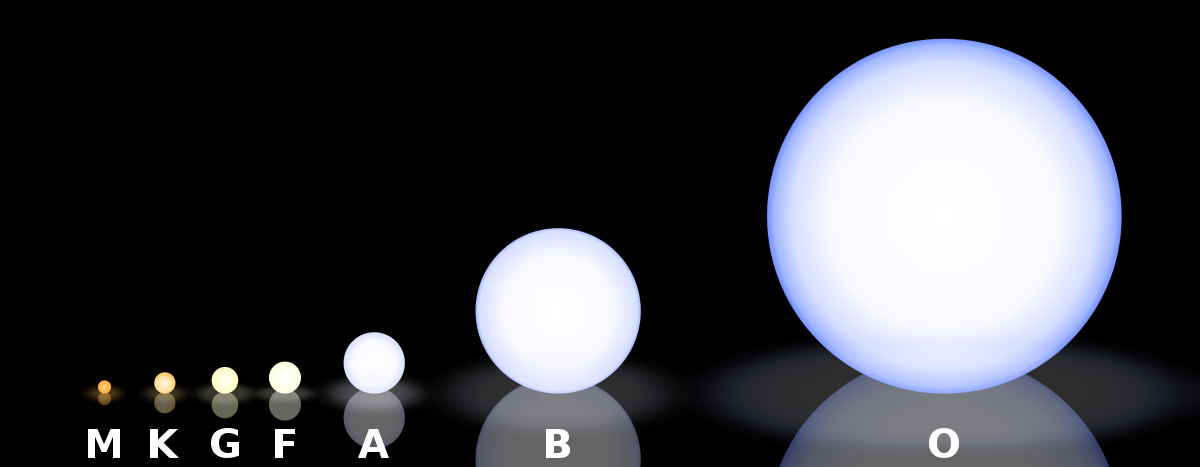

## Quick Question : Do you know what is the spectral class of our sun ?<br>
## Answer at the end of the notebook.

## Size
Stars on the basis of their size have been classified into the following main categories :
1. Red Dwarf
2. White Dwarf
3. Brown Dwarf
4. Main Sequence
5. Supergiants
6. Hypergiants

All these categories have their special place in the Hertzsprung Russell diagram which compares temperature and luminoscity of these stars.

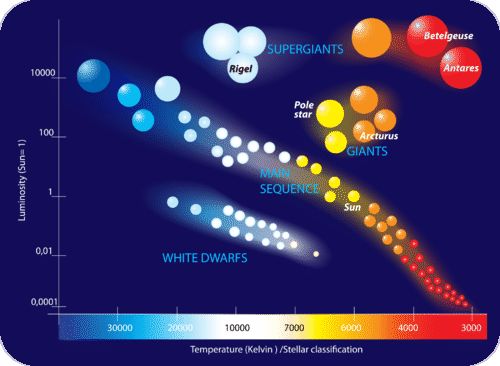

Other common parameters that will be used in this notebook are :
* Absolute Temperature (in K)
* Relative Luminosity (L/Lo)
* Relative Radius (R/Ro)
* Absolute Magnitude (Mv)
* Star Color (white,Red,Blue,Yellow,yellow-orange etc)

Now let's start the preparation of our EDA on the given dataset

## Importing the tools

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

## Loading the star data

In [ ]:
stars = pd.read_csv("../input/star-dataset/6 class csv.csv")
stars

In [ ]:
stars.info()

Checking for missing values

In [ ]:
stars.isna().sum()

Perfect ! There are no missing values

## Creating our own Hertzsprung Russell Diagram

In [ ]:
fig , ax = plt.subplots(figsize = (13,10))

R = stars[stars["Star type"] == 0]
B = stars[stars["Star type"] == 1]
W = stars[stars["Star type"] == 2]
M = stars[stars["Star type"] == 3]
S = stars[stars["Star type"] == 4]
H = stars[stars["Star type"] == 5]

ax.scatter(np.log(R["Temperature (K)"]), np.log(R["Luminosity(L/Lo)"]),5, label = 'Red dwarfs')
ax.scatter(np.log(B["Temperature (K)"]), np.log(B["Luminosity(L/Lo)"]),7, label = 'Brown dwarfs')
ax.scatter(np.log(W["Temperature (K)"]), np.log(W["Luminosity(L/Lo)"]),10, label = 'White dwarfs')
ax.scatter(np.log(M["Temperature (K)"]), np.log(M["Luminosity(L/Lo)"]),15, label = 'Main sequence stars')
ax.scatter(np.log(S["Temperature (K)"]), np.log(S["Luminosity(L/Lo)"]),30, label = 'Supergiants')
ax.scatter(np.log(H["Temperature (K)"]), np.log(H["Luminosity(L/Lo)"]),50, label = 'Hypergiants')

ax.invert_xaxis()
ax.legend()
plt.xlabel("Log Temperature")
plt.ylabel("Log Luminosity")
ax.grid()
ax.set_facecolor("black")

That looks supercool ! Compare this to the image of the hertzsprung russell diagram attached in the notebook above . Can you see the similarity ?

# Modelling
After some playing around with the subject and exploring the different aspects of the data , we can finally come up with model to train the data on.

In [ ]:
stars = stars.sample(frac=1) # shuffle the data

In [ ]:
x = stars.drop("Star type", axis=1)
y = stars["Star type"]

Converting categorical data into numerical data for usage

In [ ]:
categorical_features = ["Spectral Class","Star color"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                                remainder = "passthrough")
transformed_x = transformer.fit_transform(stars)
transformed_x 

Dividing the dataset into train and test data

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(transformed_x,y,test_size=0.2)

In [ ]:
x_train

Random forest model

In [ ]:
model = RandomForestClassifier()
model.fit(x_train,y_train)

In [ ]:
model.score(x_train,y_train)

We got a perfect score on our train data, now let's predict the outcome using test data

In [ ]:
x_test

## Predicting....

In [ ]:
y_preds = model.predict(x_test)

In [ ]:
y_preds

In [ ]:
y_test

Let's check the score of our model on test dataset

In [ ]:
print(model.score(x_test,y_preds))

### As one can see , our Random Forest model correctly predicted the star types of all stars on the test dataset.

### Answer to the question : Our sun is a G star, so it is evidently not even close to the hottest stars in the universe !

Thankyou for visiting this notebook. An upvote would be appreciated if you liked it.<br>
Also check out all of my notebooks :

1. Titanic survival prediction using sklearn pipeline : https://www.kaggle.com/rambomind/titanic-predictions-using-sklearn-pipeline

2. Heart disease classification using gridsearch CV : https://www.kaggle.com/rambomind/heart-disease-classification

3. Dog breed identification using tranfer learning : https://www.kaggle.com/rambomind/dog-breed-id-using-mobilenet-v2-130-224

4. Drinking water potability : https://www.kaggle.com/rambomind/drinking-water-potability

5. Bulldozer price prediction : https://www.kaggle.com/rambomind/bulldozer-price-prediction


